In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0106/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 429 ms, sys: 18.3 ms, total: 447 ms
Wall time: 449 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.011059,0.0,-0.011711,0.000000,-0.006434,0.013630,0.023057,0.684786,0.307315,...,0.0,-0.006937,0.0,-0.012997,2.686574e-02,-0.003969,2.686574e-02,0.003821,0.0,0.041906
1,0.0,-0.000721,0.0,-0.023931,0.000000,-0.009816,0.013184,0.034139,0.668336,0.282799,...,0.0,0.004067,0.0,-0.003655,0.000000e+00,-0.001443,0.000000e+00,0.005188,0.0,-0.029113
2,0.0,-0.011211,0.0,-0.010141,0.000000,-0.004349,0.000004,0.012422,0.557181,0.243788,...,0.0,0.001726,0.0,-0.006297,0.000000e+00,-0.007833,0.000000e+00,-0.010131,0.0,-0.018714
3,0.0,0.002511,0.0,0.000202,0.000000,-0.000347,0.007963,0.004623,0.682453,0.410303,...,0.0,-0.002479,0.0,-0.004772,3.540014e-07,-0.000397,1.334030e-07,0.002856,0.0,-0.011333
4,0.0,0.002829,0.0,-0.004357,0.000637,-0.000890,0.663987,0.018957,0.002376,0.436213,...,0.0,0.000529,0.0,-0.004696,0.000000e+00,0.003811,0.000000e+00,-0.005399,0.0,-0.002852


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.000000,0.013630,0.684786,0.000070,0.0,0.0,0.0,0.000000e+00,...,0.0,3.421241e-11,4.806623e-07,6.707872e-09,0.0,0.0,0.0,2.686574e-02,2.686574e-02,0.0
1,0.0,0.0,0.000000,0.013184,0.668336,0.000068,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
2,0.0,0.0,0.000000,0.000004,0.557181,0.042056,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
3,0.0,0.0,0.000000,0.007963,0.682453,0.000153,0.0,0.0,0.0,0.000000e+00,...,0.0,2.882791e-04,2.225325e-03,1.226370e-09,0.0,0.0,0.0,3.540014e-07,1.334030e-07,0.0
4,0.0,0.0,0.000637,0.663987,0.002376,0.000000,0.0,0.0,0.0,3.902047e-07,...,0.0,1.660674e-06,5.186155e-02,1.227432e-03,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.000000,0.013723,0.983347,0.000070,0.0,0.0,0.0,0.000000e+00,...,0.0,3.421241e-11,4.806624e-07,6.707872e-09,0.0,0.0,0.0,2.722988e-02,2.722988e-02,0.000000e+00
1,0.0,0.0,0.000000,0.013271,0.950988,0.000068,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
2,0.0,0.0,0.000000,0.000004,0.745744,0.042952,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
3,0.0,0.0,0.000000,0.007995,0.978726,0.000153,0.0,0.0,0.0,0.000000e+00,...,0.0,2.883206e-04,2.227803e-03,1.226370e-09,0.0,0.0,0.0,3.540014e-07,1.334030e-07,0.000000e+00
4,0.0,0.0,0.000637,0.942521,0.002379,0.000000,0.0,0.0,0.0,3.902048e-07,...,0.0,1.660675e-06,5.322992e-02,1.228185e-03,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
5,0.0,0.0,0.000000,0.472769,0.472769,0.000000,0.0,0.0,0.0,3.276872e-05,...,0.0,2.422680e-08,1.736007e-06,1.235649e-10,0.0,0.0,0.0,1.074720e-05,1.315611e-03,2.159415e-07
6,0.0,0.0,0.000000,0.000142,0.210626,0.000532,0.0,0.0,0.0,1.711851e-03,...,0.0,0.000000e+00,4.419209e-04,2.317986e-04,0.0,0.0,0.0,2.415051e-05,4.604263e-05,0.000000e+00


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    38.999667
1    38.999989
2    45.000000
3    39.986887
4    42.999997
5    47.996502
6    38.000000
dtype: float64

In [26]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    # sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 154 ms, sys: 33.4 ms, total: 187 ms
Wall time: 187 ms


In [27]:
len(catch_all_averaged_preds)

910

In [28]:
catch_all_averaged_preds[0]

array([-0.01082675, -0.00068011, -0.01109235,  0.00254527,  0.00289263,
        0.0036753 , -0.00312718], dtype=float32)

In [29]:
# make this a dataframe

In [30]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [31]:
Forecasted_values_df.shape

(7, 910)

In [32]:
sum_forecasted_values = Forecasted_values_df.sum(axis = 1)

In [33]:
sum_forecasted_values

0    27.908463
1    29.090797
2    30.070513
3    31.928978
4    29.350367
5    35.307438
6    35.522667
dtype: float32

In [34]:
# These results are absurd, let's stick to what we had done before, we can justify that, this is what we did for comps as well

In [35]:
# concatenate the sum dataframes
block_0106_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0106_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0106_true_and_forecasted_values_df

,True_count,Forecasted_count
0,38.999667,27.908463
1,38.999989,29.090797
2,45.000000,30.070513
3,39.986887,31.928978
4,42.999997,29.350367
5,47.996502,35.307438
6,38.000000,35.522667


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

11.100117897148957

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

10.400545734855054

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.24965516898272433, pvalue=0.5892559097826604)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-9.337675514203903

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 221 ms, sys: 68.7 ms, total: 290 ms
Wall time: 290 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[-0.01324214,  0.00232556, -0.0105692 , ...,  0.00753374,
         0.00807004, -0.00333063],
       [-0.01013194,  0.00556478, -0.01149462, ...,  0.00703584,
         0.00548667, -0.00363767],
       [-0.01021458,  0.00330739, -0.01253191, ...,  0.00763428,
         0.00700051, -0.00463535],
       ...,
       [-0.01399888,  0.00083832, -0.00727727, ...,  0.00724761,
         0.00348948, -0.00191024],
       [-0.01397727, -0.00017081, -0.00699311, ...,  0.00462091,
         0.00344183, -0.00166178],
       [-0.0137952 ,  0.00109655, -0.0083227 , ...,  0.00452676,
         0.0036149 , -0.00056598]], dtype=float32)

In [51]:
# %%time
# # convert less than 0 entries to 0 for all arrays
# for arr in loaded_npy_files:
#     arr[arr < 0] = 0

In [52]:
loaded_npy_files[0]

array([[-0.01324214,  0.00232556, -0.0105692 , ...,  0.00753374,
         0.00807004, -0.00333063],
       [-0.01013194,  0.00556478, -0.01149462, ...,  0.00703584,
         0.00548667, -0.00363767],
       [-0.01021458,  0.00330739, -0.01253191, ...,  0.00763428,
         0.00700051, -0.00463535],
       ...,
       [-0.01399888,  0.00083832, -0.00727727, ...,  0.00724761,
         0.00348948, -0.00191024],
       [-0.01397727, -0.00017081, -0.00699311, ...,  0.00462091,
         0.00344183, -0.00166178],
       [-0.0137952 ,  0.00109655, -0.0083227 , ...,  0.00452676,
         0.0036149 , -0.00056598]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[39.557228, 34.382744, 38.015583, ..., 31.45394 , 30.78945 ,
        29.84015 ],
       [29.74942 , 30.363327, 31.783663, ..., 24.374565, 35.975147,
        36.36359 ],
       [46.165833, 38.003933, 39.303825, ..., 47.58612 , 48.467113,
        57.61809 ],
       ...,
       [27.272118, 31.300934, 33.946613, ..., 34.948994, 41.609604,
        40.115894],
       [30.111572, 32.610306, 46.116276, ..., 48.375805, 44.08079 ,
        42.97951 ],
       [30.00199 , 37.285522, 43.650326, ..., 38.57041 , 49.81906 ,
        47.763428]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[39.557228, 34.382744, 38.015583, ..., 31.45394 , 30.78945 ,
        29.84015 ],
       [29.74942 , 30.363327, 31.783663, ..., 24.374565, 35.975147,
        36.36359 ],
       [46.165833, 38.003933, 39.303825, ..., 47.58612 , 48.467113,
        57.61809 ],
       ...,
       [27.272118, 31.300934, 33.946613, ..., 34.948994, 41.609604,
        40.115894],
       [30.111572, 32.610306, 46.116276, ..., 48.375805, 44.08079 ,
        42.97951 ],
       [30.00199 , 37.285522, 43.650326, ..., 38.57041 , 49.81906 ,
        47.763428]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[15.08313487],
       [16.9913156 ],
       [15.8263659 ],
       [15.19880865],
       [12.62042522],
       [20.00555496],
       [18.38009229]])

In [63]:
ui_train

array([[42.3626008 ],
       [42.03702745],
       [44.57668228],
       [48.82989225],
       [46.87989941],
       [51.40373774],
       [61.43584347]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

31.91714084489005

In [66]:
y_traina = block_0106_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[38.99966683],
       [38.99998931],
       [44.99999976],
       [39.98688736],
       [42.99999732],
       [47.99650174],
       [37.99999993]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.8571428571428571

In [70]:
np.mean(output, axis = 0)

array([27.908472, 29.09079 , 30.07051 , 31.92898 , 29.350368, 35.307407,
       35.522633], dtype=float32)

In [71]:
sum_forecasted_values

0    27.908463
1    29.090797
2    30.070513
3    31.928978
4    29.350367
5    35.307438
6    35.522667
dtype: float32

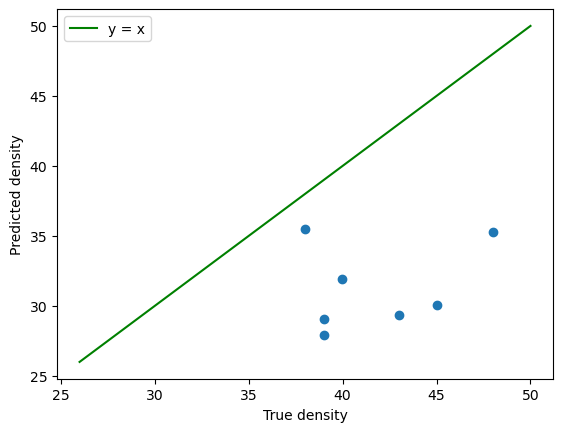

In [76]:
plt.scatter(block_0106_true_and_forecasted_values_df['True_count'], block_0106_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([26, 50], [26, 50], color='green', label='y = x')
plt.legend()
plt.show()

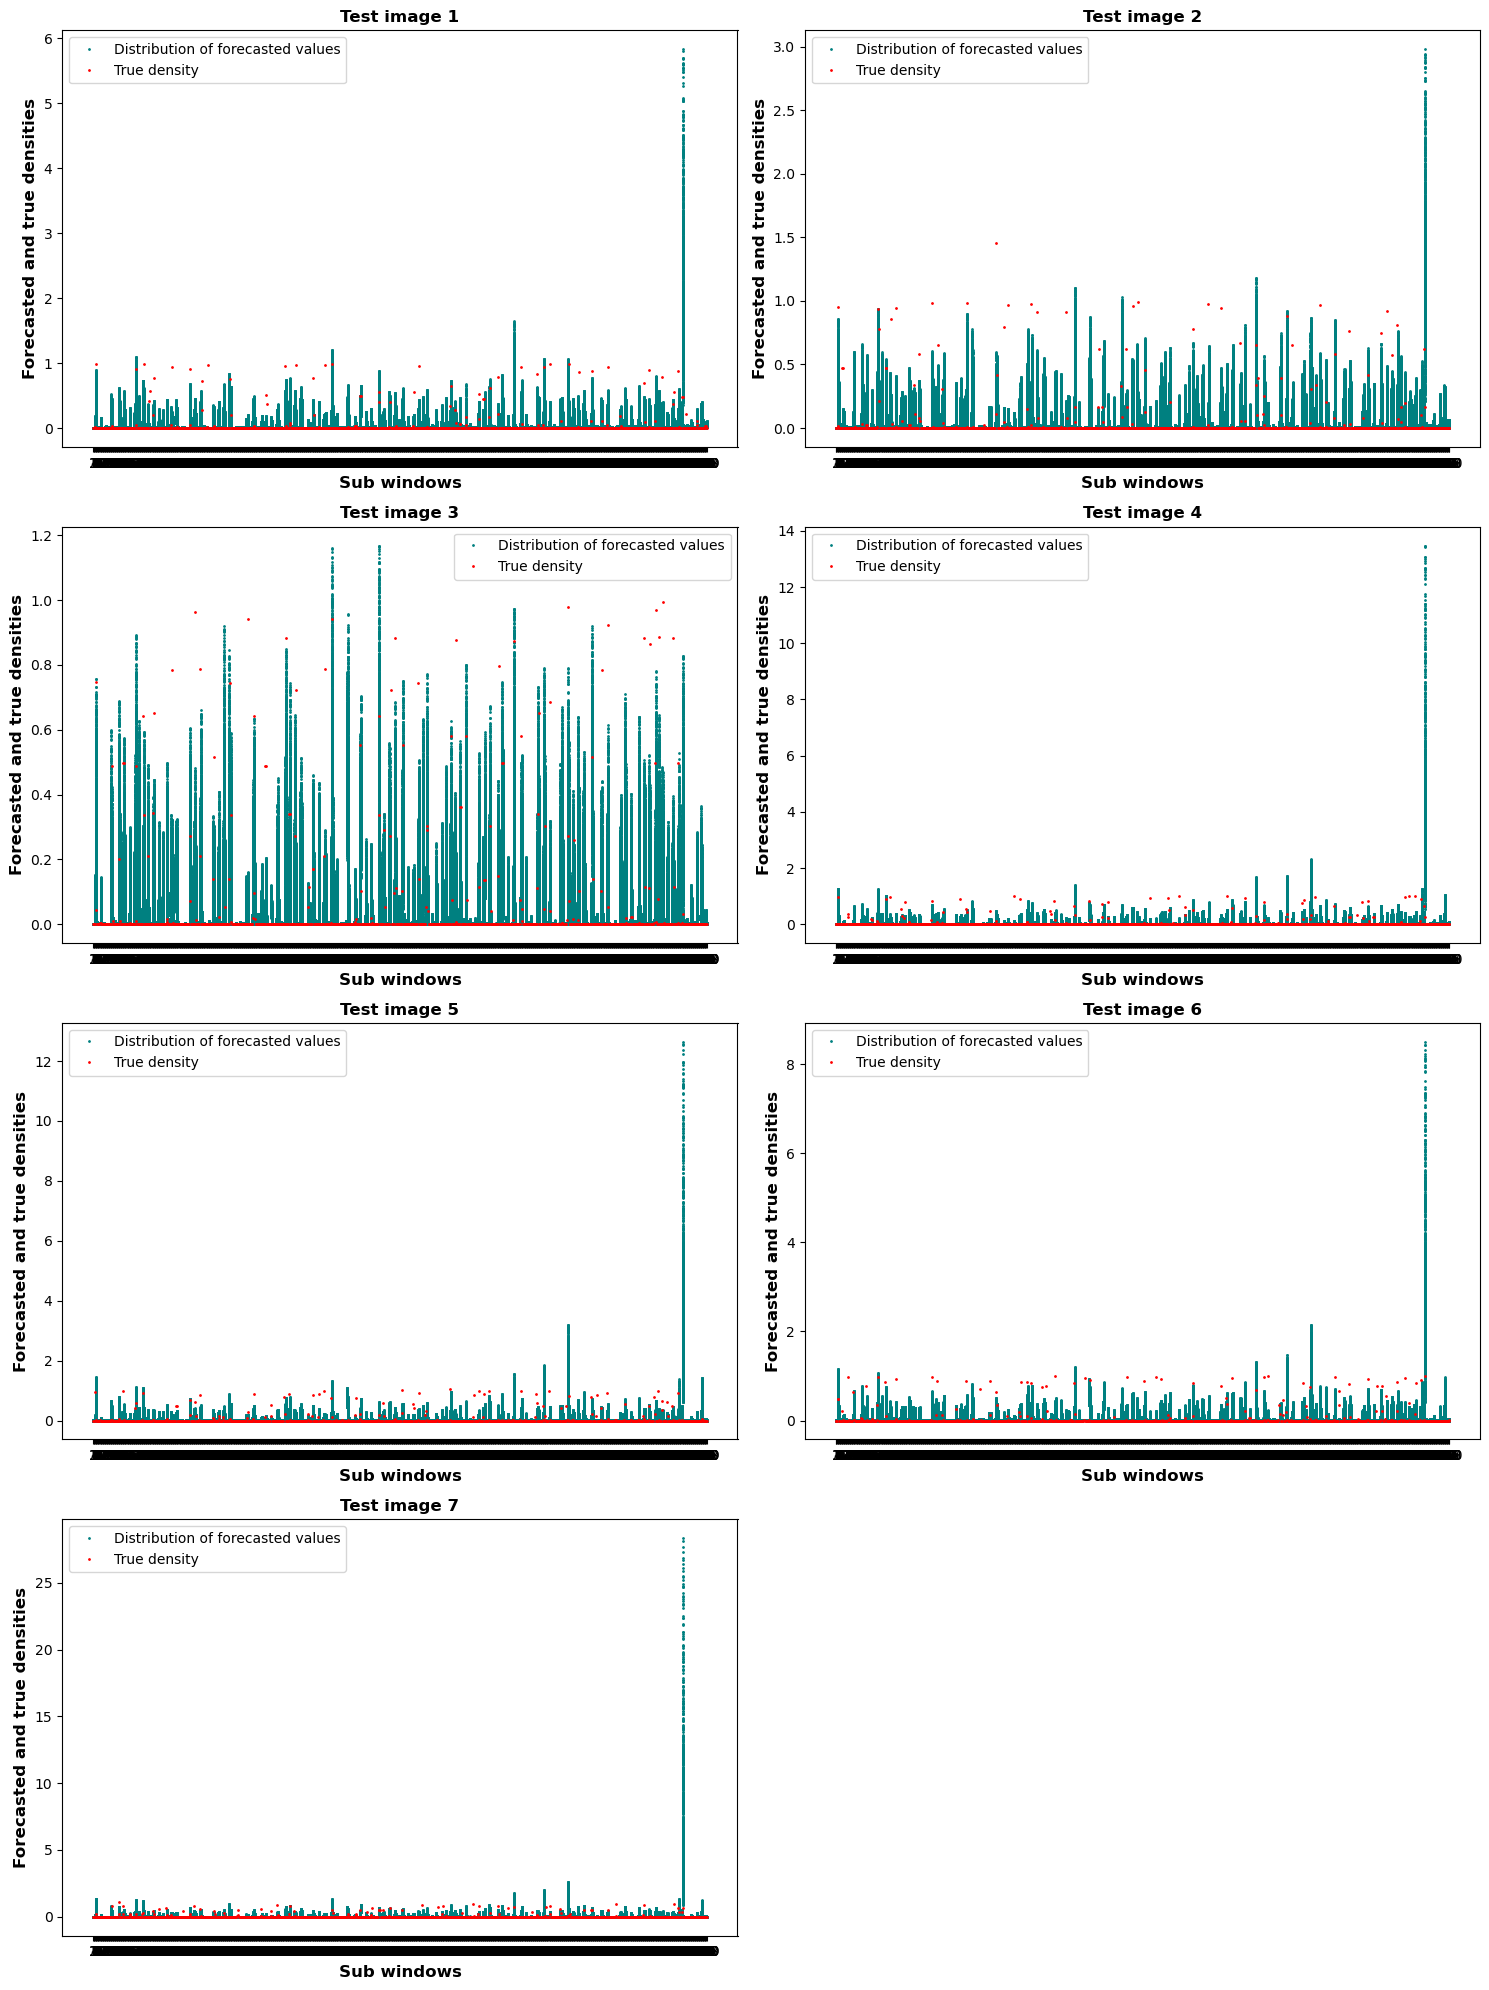

CPU times: user 27.2 s, sys: 889 ms, total: 28.1 s
Wall time: 27.7 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 